Target: ['ace_spades', '2_clubs', '3_hearts', '4_diamonds'] 

Target (encode): [0, 14, 28, 42] 


Generasi; Individu Terbaik; Label Individu Terbaik; Fitness Terbaik; Rata-rata Fitness
0 ; [8, 8, 25, 50] ; ['9_spades', '9_spades', 'king_clubs', 'queen_diamonds'] ; 183 ; 140.63
100 ; [4, 14, 28, 40] ; ['5_spades', '2_clubs', '3_hearts', '2_diamonds'] ; 202 ; 202.0
200 ; [4, 14, 28, 40] ; ['5_spades', '2_clubs', '3_hearts', '2_diamonds'] ; 202 ; 202.0
300 ; [4, 14, 28, 43] ; ['5_spades', '2_clubs', '3_hearts', '5_diamonds'] ; 203 ; 202.76
400 ; [4, 14, 28, 43] ; ['5_spades', '2_clubs', '3_hearts', '5_diamonds'] ; 203 ; 203.0
500 ; [2, 14, 28, 43] ; ['3_spades', '2_clubs', '3_hearts', '5_diamonds'] ; 205 ; 204.78
600 ; [2, 14, 28, 43] ; ['3_spades', '2_clubs', '3_hearts', '5_diamonds'] ; 205 ; 205.0
700 ; [2, 14, 28, 43] ; ['3_spades', '2_clubs', '3_hearts', '5_diamonds'] ; 205 ; 205.0
800 ; [0, 14, 28, 42] ; ['ace_spades', '2_clubs', '3_hearts', '4_diamonds'] ; 208 ; 207.31
900 ; [0, 14,

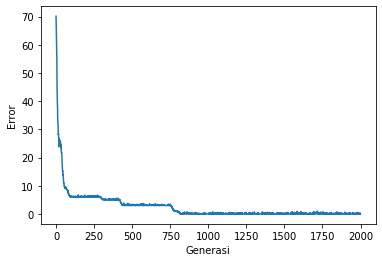

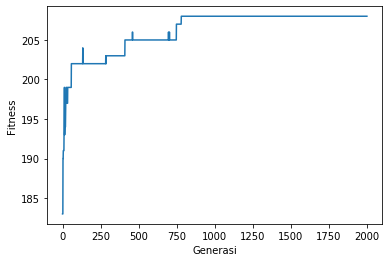

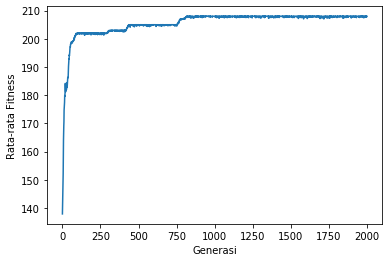

In [11]:
import random
import string
import numpy as np
import math
import matplotlib.pyplot as plt


lst_all_kartu = []        
lst_pilihan_kartu = ['ace_spades','2_clubs','3_hearts','4_diamonds']
lst_pilihan_kartu_idx = []
lst_generasi = []

def init():
    card_vals = ['ace','2', '3', '4', '5', '6', '7', '8', '9', '10', 'jack', 'queen', 'king']
    card_suits = ['spades', 'clubs', 'hearts', 'diamonds']
    
    for suit in card_suits:
        for val in card_vals:
            lst_all_kartu.append(val+'_'+suit) 
        
    for pilihan in lst_pilihan_kartu:
        lst_pilihan_kartu_idx.append(lst_all_kartu.index(pilihan))
        
        
    print('Target:',lst_pilihan_kartu,'\n')
    print('Target (encode):',lst_pilihan_kartu_idx,'\n\n')

#Decode Individu
def decode_kromosom(xkromosom):
    xkromosom_label = []
    for g in xkromosom:
        #print(g)
        xkromosom_label.append(lst_all_kartu[g])    
    return xkromosom_label

#Hitung Fitness Individu/ Kromosom
def hitung_fitness(xkromosom):
    E=0
    for i in range(len(lst_pilihan_kartu_idx)):
        E+= abs(xkromosom[i]-lst_pilihan_kartu_idx[i])
    
    fitness =len(lst_all_kartu)*len(lst_pilihan_kartu_idx)-E
   
    return fitness,E

#Membuat kromosom untuk populasi awal
def buat_kromosom_acak(xnum_start,xnum_stop,xsize):
    genes = []
    
    while len(genes) < xsize:
        val = random.randrange(xnum_start, xnum_stop)
        genes.append(val)
        
    return genes

#Membuat Populasi Awal
def buat_populasi_acak(xjml_gen_per_kromosom,xjml_kromosom):
    kromosoms = []
    while len(kromosoms) < xjml_kromosom:
        val = buat_kromosom_acak(0,len(lst_all_kartu),xjml_gen_per_kromosom)
        kromosoms.append(val)
    return kromosoms

#Bagian utama Algoritma Genetika
def proses_GA(xpopulasi):
    populasi = [pop[:] for pop in xpopulasi]  
    
    # Set nilai probabilitas CO dan Mutasi
    probabilitas_crossover = 0.9
    probabilitas_mutasi = 0.005   
    
    # Set Jumlah Populasi & Gen
    jumlah_individu_per_populasi = len(xpopulasi)
    jumlah_gen = len(xpopulasi[0])         
    
    #Hitung fitness masing-masing individu
    lst_fitness = []
    lst_error = []
    best_fitness = 0
    best_individu = []    
    for individu in populasi:
        fitness_individu, Err = hitung_fitness(individu)
        lst_error.append(Err)
        lst_fitness.append(fitness_individu)
        if fitness_individu > best_fitness:
            best_fitness = fitness_individu
            best_individu =  individu.copy()
    
    total_fitness = sum(lst_fitness)       
    average_error = sum(lst_error)/len(lst_error)
    average_fitness = sum(lst_fitness)/len(lst_fitness)
    
    #Hitung persentase fitness masing-masing individu
    lst_fitness_percent = [] 
    for fitness in lst_fitness:
        lst_fitness_percent.append(fitness/total_fitness*100)
              
    #Mapping Persentase Fitness
    pct_idx = 0
    lst_map_fitness_percent=[]
    for pct_fitness in lst_fitness_percent:
        pct_idx+=pct_fitness
        lst_map_fitness_percent.append(pct_idx)
  
    #Roulette Selection
    lst_individu_terpilih=[]   
    for i in range(jumlah_individu_per_populasi):
        r = random.randrange(0, 100)
        for idx,pct_map in enumerate(lst_map_fitness_percent):      
            if pct_map > r:
                lst_individu_terpilih.append(populasi[idx])
                break
               
    #Crossover 
    lst_individu_terpilih_cross = [lst[:] for lst in lst_individu_terpilih]
    for i in range(jumlah_individu_per_populasi//2):
        r = random.randrange(0, 10)/10
        if r < probabilitas_crossover: 
            r_pos_gen = random.randrange(0,jumlah_gen)
            
            # Temporary Parent
            parent1 = lst_individu_terpilih_cross[2*i].copy()
            parent2 = lst_individu_terpilih_cross[2*i+1].copy()
            
            if best_individu == parent1 or best_individu == parent2:
                continue;
            
            # Do CrossOver
            lst_individu_terpilih_cross[2*i]=parent1[0:r_pos_gen] + parent2[r_pos_gen:]           
            lst_individu_terpilih_cross[2*i+1]=parent2[0:r_pos_gen] + parent1[r_pos_gen:]
            
            
    #Mutasi
    lst_individu_terpilih_mutasi = [lst[:] for lst in lst_individu_terpilih_cross]
    for i in range(jumlah_individu_per_populasi):
        r = random.randrange(0,1000)/1000
        
        if best_individu == lst_individu_terpilih_mutasi[i][r_pos_gen]:
            continue;
            
        if r < probabilitas_mutasi:
            r_pos_gen = random.randrange(0,jumlah_gen)
            lst_individu_terpilih_mutasi[i][r_pos_gen] = random.randrange(0,len(lst_all_kartu))
            
    return lst_individu_terpilih_mutasi,average_error,average_fitness,best_individu,best_fitness
             
    
def run(xjumlah_generasi):
    
    #inisialisasi
    init()
    #Inisialisasi Jumlah Populasi
    jumlah_individu_per_populasi = 100
    
    #Inisialisasi Jumlah Gen
    jumlah_gen = len(lst_pilihan_kartu_idx)
    
    # Buat Populasi Awal
    populasi_awal = buat_populasi_acak(jumlah_gen,jumlah_individu_per_populasi)
    populasi_pilihan,avg_error,avg_fitness,best_individu,best_fitness = proses_GA(populasi_awal)
    cur_generasi = [gen[:] for gen in populasi_pilihan]
    
    lst_avg_error = []
    lst_avg_error.append(avg_error)
    
    lst_avg_fitness = []
    lst_avg_fitness.append(avg_fitness)  
    
    lst_best_fitness = []
    lst_best_fitness.append(best_fitness)
    
    
    print('Generasi; Individu Terbaik; Label Individu Terbaik; Fitness Terbaik; Rata-rata Fitness')
    
    #Pemrosesan algoritma Genetika sejumlah generasi tertentu
    for i in range(xjumlah_generasi-1):
        populasi_pilihan,avg_error,avg_fitness,best_individu,best_fitness = proses_GA(cur_generasi)
        cur_generasi = [gen[:] for gen in populasi_pilihan]
        lst_generasi.append(cur_generasi)
        lst_avg_error.append(avg_error)
        lst_avg_fitness.append(avg_fitness)
        lst_best_fitness.append(best_fitness)
        
    
        
        if(i%100==0):
            print(i,';',best_individu,';',decode_kromosom(best_individu),';',best_fitness,';', avg_fitness) 
    
    
    
    best_individu_label=[]
    for idx,bst in enumerate(best_individu):
        best_individu_label.append(lst_all_kartu[bst])
        
    m = max(lst_avg_fitness)
    print("**** Max Fitness: ",m)
    print("**** Individu Terpilih:",best_individu_label) 
    
    
    plt.xlabel('Generasi')
    plt.ylabel('Error')
    plt.plot(lst_avg_error)
    
    plt.figure()
    
    plt.plot(lst_best_fitness)
    plt.xlabel('Generasi')
    plt.ylabel('Fitness')
    
    plt.figure()
    
    plt.xlabel('Generasi')
    plt.ylabel('Rata-rata Fitness')
    plt.plot(lst_avg_fitness)
    #print(lst_generasi[-1])
    
    
run(2000)
